### DS Challenge LATAM Airlines

##### 0. Carga de paquetes, lectura de datos y procesamiento básico

In [1]:
#Paquetes a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lee datos y los inserta en un df
df = pd.read_csv('dataset_SCL.csv')

C:\Users\oscar\AppData\Local\Temp\ipykernel_12384\553996775.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_SCL.csv')


In [15]:
#Revisa el encabezado del df
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha_d,one
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,2017-01-03,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,2017-01-05,1


In [4]:
#Se revisa la estructura de los datos y los missing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB
None


In [9]:
#Se detecta un missing en la columa 'Vlo-O'.
df[df['Vlo-O'].isna()]
#No parece ser relevante para el análisis, por lo tanto no se imputa.

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha_d,one
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima,2017-01-19,1


In [16]:
#Se convierten columnas a formato fecha
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])

##### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

            Vlo-O             
TIPOVUELO       I            N
AÑO          2017 2018    2017
MES                           
1          2802.0  2.0  3303.0
2          2499.0  NaN  3062.0
3          2496.0  NaN  2986.0
4          2354.0  NaN  2666.0
5          2428.0  NaN  2812.0
6          2373.0  NaN  2608.0
7          2865.0  NaN  3127.0
8          2719.0  NaN  3025.0
9          2605.0  NaN  3005.0
10         2687.0  NaN  3345.0
11         2610.0  NaN  3470.0
12         2799.0  NaN  3557.0
                   Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O  \
66918  2017-12-31 23:55:00   602  SCEL  KLAX   LAN  2018-01-01 00:02:00   
66947  2017-12-31 23:40:00   622  SCEL  MMMX   LAN  2018-01-01 00:12:00   

       Vlo-O Ori-O Des-O Emp-O  DIA  MES   AÑO DIANOM TIPOVUELO        OPERA  \
66918  602.0  SCEL  KLAX   LAN    1    1  2018  Lunes         I  Grupo LATAM   
66947  622.0  SCEL  MMMX   LAN    1    1  2018  Lunes         I  Grupo LATAM   

       SIGLAORI          SIGLADES    

[Text(0.5, 0, 'Día de la semana'), Text(0, 0.5, 'Número de vuelos')]

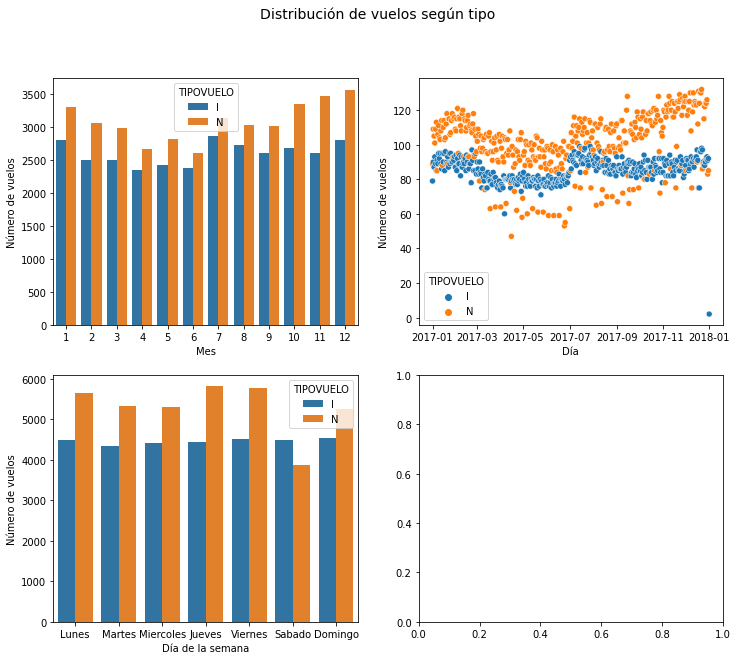

In [14]:
#Distribución de los datos según año y mes
print(pd.pivot_table(df, values = ['Vlo-O'], index = ['MES'], columns = ['TIPOVUELO','AÑO'], aggfunc = 'count'))
#Existen solamente 2 datos del año 2018 para los vuelos internacionales. Seguramente corresponden a atrasos del 2017. Se verifica esta situación:
print(df[df['AÑO']==2018])

#Grafica distribución de vuelos durante el año
#Genera variable fecha redondeando a nivel de día
df['fecha_d'] = pd.to_datetime(dict(year = df.AÑO, month = df.MES, day = df.DIA))
df['one'] = 1

df_sum_d = df[['AÑO','MES','DIA','fecha_d','Vlo-O','TIPOVUELO']].groupby(['AÑO','MES','DIA','fecha_d','TIPOVUELO'], as_index=False).count()

#Grafica distribución de vuelos en el tiempo y según tipo
fig, ax = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('Distribución de vuelos según tipo', fontsize=14)
plt1 = sns.barplot(data=df, x='MES', y='one', hue='TIPOVUELO', estimator=sum, errorbar=None, ax = ax[0,0])
plt1.set(xlabel='Mes', ylabel='Número de vuelos')
plt2 = sns.scatterplot(data=df_sum_d, x='fecha_d', y='Vlo-O', hue='TIPOVUELO', ax = ax[0,1])
plt2.set(xlabel='Día', ylabel='Número de vuelos')
plt3 = sns.barplot(data=df, x='DIANOM', y='one', hue='TIPOVUELO', estimator=sum, order=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes',
    'Sabado', 'Domingo'], errorbar=None, ax = ax[1,0])
plt3.set(xlabel='Día de la semana', ylabel='Número de vuelos')


En los vuelos nacionales e internacionales el mayor número de vuelos está asociado al período de vacaciones de invierno y verano.

El menor tráfico de febrero de la serie mensual se explica por la menor cantidad de días que tiene el mes, donde ajustando por el menor número de días se llega a 2,661 vuelos $(2/30 \approx 6.5\% \rightarrow 2499*(1+6,5\%) = 2,661)$. Esto es evidente de igual manera en el gráfico de vuelos por día, donde los vuelos diaros de febrero son comparables a los de enero. , aunque en los vuelos internacionales se modera el tráfico en febrero.

En los vuelos nacionales, además, se observa una alta demanda en octubre y noviembre.

En serie diaria llama la atención la discontinuidad que se genera en julio, tanto en la serie nacional como en la internacional, con el inicio de las vacaciones de invierno.

En la distribución por día de la semana, es notable el menor número de vuelos los días sábados en el segmento nacional, mientras que el mayor número de vuelos se observa los días viernes, sábados y lunes, que se corresponde con la semana laboral.

Podría ser informativo hacer otras segmentaciones, según hora del día, destino norte/sur (nacionales), continental/intercontinental (internacional). Sin embargo, un excesivo detalle iría más allá del objetivo de este challenge.

##### 2. Genera las columnas adicionales y luego expórtelas en un archivo `synthetic_features.csv` :
* `temporada_alta` : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* `dif_min` : diferencia en minutos entre Fecha-O y Fecha-I .
* `atraso_15` : 1 si dif_min > 15, 0 si no.
* `periodo_dia` : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [20]:
#Definimos 'temporada_alta'
df['temporada_alta'] = 0
df.loc[(df['Fecha-I'] >= '2016-12-15 00:00:00') & (df['Fecha-I'] < '2017-04-03 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-12-15 00:00:00') & (df['Fecha-I'] < '2018-04-03 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-07-15 00:00:00') & (df['Fecha-I'] < '2017-08-01 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-09-11 00:00:00') & (df['Fecha-I'] < '2017-10-01 00:00:00'), 'temporada_alta'] = 1

In [60]:
#Definimos 'dif_min'
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

In [31]:
#Definimos 'atraso_15'
df['atraso_15'] = 0
df.loc[df['dif_min']>15, 'atraso_15'] = 1

In [37]:
#Definimos 'periodo_dia'
df.loc[(df['Fecha-I'].dt.hour>=5) & (df['Fecha-I'].dt.hour<12), 'periodo_dia'] = 'mañana'
df.loc[(df['Fecha-I'].dt.hour>=12) & (df['Fecha-I'].dt.hour<19), 'periodo_dia'] = 'tarde'
df.loc[df['periodo_dia'].isna(), 'periodo_dia'] = 'noche'

In [39]:
#Genera archivo synthetic_features.csv
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index=False)